<a href="https://colab.research.google.com/github/silviiaaslv/Final-Project-Data-Mining---Kelompok-Erupsi/blob/main/Tugas_1_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 1 KULIAH DATA MINING
## EDA - ASHRAE - Great Energy Predictor III

1. Asita Darma Irawati   (1806186982)
2. Joseph Diaz Ardy      (1806187000)
3. Muhammad Ghazy        (1806193445)
4. Rasendriya Maheswari  (1806193470)
5. Rifqi Wazirsyah       (1806144531)
6. Windy Auliawaty       (1806186950)
7. Zalfa Alifah Budiawan (1806147666)




### Install Dependecies + Download Dataset

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import datetime
import calendar, folium
plt.style.use('bmh'); sns.set()

In [ ]:
from google.colab import files
files.upload()

TypeError: ignored

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sumit261124/ashrae-great-energy-predictor-iii-dataset

 97% 369M/379M [00:13<00:00, 18.1MB/s]
100% 379M/379M [00:13<00:00, 29.5MB/s]


In [ ]:
!unzip ashrae-great-energy-predictor-iii-dataset.zip

Archive:  ashrae-great-energy-predictor-iii-dataset.zip
  inflating: building_metadata.csv   
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: weather_test.csv        
  inflating: weather_train.csv       


In [ ]:
building_metadata = pd.read_csv('building_metadata.csv')
train = pd.read_csv('train.csv')
weather_train = pd.read_csv('weather_train.csv')

### Overview Dataset

In [ ]:
train.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575
20216099,1448,0,2016-12-31 23:00:00,2.850


In [ ]:
building_metadata.tail()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


In [ ]:
weather_train.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


### Joining Dataset

In [ ]:
train_building = pd.merge(train,building_metadata,how = 'left', left_on=['building_id'],right_on=['building_id'])

In [ ]:
train_building.tail()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN
20216099,1448,0,2016-12-31 23:00:00,2.850,15,Office,92271,2001.0,NaN


In [ ]:
train_building.isna().sum()

building_id             0
meter                   0
timestamp               0
meter_reading           0
site_id                 0
primary_use             0
square_feet             0
year_built       12127645
floor_count      16709167
dtype: int64

In [ ]:
train_building_weather = pd.merge(train_building,weather_train,how = 'left',left_on = ['site_id','timestamp'],right_on=['site_id','timestamp'])

In [ ]:
train_building_weather.head(5).transpose()

,0,1,2,3,4
building_id,0,1,2,3,4
meter,0,0,0,0,0
timestamp,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
meter_reading,0,0,0,0,0
site_id,0,0,0,0,0
primary_use,Education,Education,Education,Education,Education
square_feet,7432,2720,5376,23685,116607
year_built,2008,2004,1991,2002,1975
floor_count,NaN,NaN,NaN,NaN,NaN
air_temperature,25,25,25,25,25


# Describing and PreProcessing

In [ ]:
# Merubah format variabel kategorik serta menambahkan kolom waktu
def preprocess():
  train_building_weather["timestamp"] = pd.to_datetime(train_building_weather["timestamp"])
  train_building_weather["jam"] = np.uint8(train_building_weather["timestamp"].dt.hour)
  train_building_weather["hari"] = train_building_weather["timestamp"].dt.weekday
  train_building_weather["bulan"] = np.uint8(train_building_weather["timestamp"].dt.month)
  train_building_weather['primary_use'] = train_building_weather['primary_use'].astype('category') 
  train_building_weather['meter'] = train_building_weather['meter'].astype('category') 
  train_building_weather['building_id'] = train_building_weather['building_id'].astype('category') 
  train_building_weather['site_id'] = train_building_weather['site_id'].astype('category') 
  train_building_weather['year_built'] = train_building_weather['year_built'].astype('category') 
  train_building_weather['jam'] = train_building_weather['jam'].astype('category') 
  train_building_weather['hari'] = train_building_weather['hari'].astype('category') 
  train_building_weather['bulan'] = train_building_weather['bulan'].astype('category') 

preprocess()

In [ ]:
train_building_weather.dtypes

building_id                 category
meter                       category
timestamp             datetime64[ns]
meter_reading                float64
site_id                     category
primary_use                 category
square_feet                    int64
year_built                  category
floor_count                  float64
air_temperature              float64
cloud_coverage               float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
jam                         category
hari                        category
bulan                       category
dtype: object

In [ ]:
# Merubah kategori variabel "Hari" menjadi nama-nama hari dalam seminggu
def hari():
  hari_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}
  train_building_weather['hari'] = [hari_[i] for i in train_building_weather['hari']]
  
hari()

In [ ]:
train_building_weather.describe() 

,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,3.506933e+06,2.011944e+07,1.139074e+07,2.011596e+07,1.646708e+07,1.898443e+07,1.876705e+07,2.007242e+07
mean,2.117121e+03,1.077830e+05,4.184848e+00,1.598795e+01,1.900423e+00,7.747429e+00,7.964155e-01,1.016085e+03,1.730151e+02,3.377525e+00
std,1.532356e+05,1.171424e+05,4.008277e+00,1.094729e+01,2.402909e+00,1.017867e+01,7.468997e+00,7.060539e+00,1.140574e+02,2.265694e+00
min,0.000000e+00,2.830000e+02,1.000000e+00,-2.890000e+01,0.000000e+00,-3.500000e+01,-1.000000e+00,9.682000e+02,0.000000e+00,0.000000e+00
25%,1.830000e+01,3.252700e+04,1.000000e+00,8.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011600e+03,7.000000e+01,2.100000e+00
50%,7.877500e+01,7.270900e+04,3.000000e+00,1.670000e+01,0.000000e+00,8.900000e+00,0.000000e+00,1.016000e+03,1.800000e+02,3.100000e+00
75%,2.679840e+02,1.391130e+05,6.000000e+00,2.410000e+01,4.000000e+00,1.610000e+01,0.000000e+00,1.020500e+03,2.800000e+02,4.600000e+00
max,2.190470e+07,8.750000e+05,2.600000e+01,4.720000e+01,9.000000e+00,2.610000e+01,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01


# Missing Values Analysis

In [ ]:
# Memeriksa jumlah missing value
train_building_weather.isna().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
jam                          0
hari                         0
bulan                        0
dtype: int64

In [ ]:
percent_missing = train_building_weather.isnull().sum() * 100 / len(train_building_weather)
missing_value_df = pd.DataFrame({'column_name': train_building_weather.columns,
                                 'percent_missing': [f"{round(i,1)}%" for i in percent_missing]})
missing_value_df.loc[missing_value_df['percent_missing'] != '0.0%'].sort_values('percent_missing',ascending = False)

,column_name,percent_missing
8,floor_count,82.7%
14,wind_direction,7.2%
7,year_built,60.0%
13,sea_level_pressure,6.1%
10,cloud_coverage,43.7%
12,precip_depth_1_hr,18.5%
15,wind_speed,0.7%
9,air_temperature,0.5%
11,dew_temperature,0.5%


In [ ]:
# Drop year_build, floor_count
def dropper():
  train_building_weather.drop(['year_built','floor_count'],axis=1,inplace = True)
dropper()

Kelompok kami memutuskan untuk mengeliminasi variabel dengan proporsi *missing value* diatas 50%. Sedemikian sehingga, kelompok kami mengeliminasi variabel "year_built" dan "floor_count"
Untuk *missing value* dibawah 50%

Selanjutnya kami akan melakukan imputasi terkait missing value pada variabel yang memiliki persentase missing value dibawah 50%. Metode yang kami akan gunakan adalah metode interpolasi linear terhadap variabel berdasarkan site_id. Kami menggunakan metode interpolasi karena data yang digunakan adalah time series dan metode interpolasi dapat memperhitungkan perubahan nilai variabel seiring berubahnya waktu.

In [ ]:
for site in range(15+1):
    weather_train.update(weather_train.loc[weather_train['site_id'] == site]['wind_direction'].interpolate())
    weather_train.update(weather_train.loc[weather_train['site_id'] == site]['sea_level_pressure'].interpolate())
    weather_train.update(weather_train.loc[weather_train['site_id'] == site]['cloud_coverage'].interpolate())
    weather_train.update(weather_train.loc[weather_train['site_id'] == site]['precip_depth_1_hr'].interpolate())
    weather_train.update(weather_train.loc[weather_train['site_id'] == site]['wind_speed'].interpolate())
    weather_train.update(weather_train.loc[weather_train['site_id'] == site]['air_temperature'].interpolate())
    weather_train.update(weather_train.loc[weather_train['site_id'] == site]['dew_temperature'].interpolate())

In [ ]:
weather_train.isna().sum()

site_id                   0
timestamp                 0
air_temperature           0
cloud_coverage        17257
dew_temperature           0
precip_depth_1_hr     26423
sea_level_pressure     8875
wind_direction            0
wind_speed                0
dtype: int64

In [ ]:
weather_train.groupby('site_id').agg('min')

,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
site_id,,,,,,,,
0,2016-01-01 00:00:00,1.7,0.0,-9.4,-1.0,992.0,0.0,0.0
1,2016-01-01 00:00:00,-3.9,0.0,-8.9,NaN,973.3,0.0,0.0
2,2016-01-01 00:00:00,2.2,0.0,-17.2,-1.0,999.3,0.0,0.0
3,2016-01-01 00:00:00,-10.6,0.0,-22.8,-1.0,991.5,0.0,0.0
4,2016-01-01 01:00:00,1.1,0.0,-9.4,-1.0,999.8,0.0,0.0
5,2016-01-01 01:00:00,-3.0,0.0,-6.0,NaN,NaN,0.0,0.0
6,2016-01-01 01:00:00,-13.3,0.0,-23.3,-1.0,991.3,0.0,0.0
7,2016-01-01 00:00:00,-28.8,NaN,-35.0,2.0,983.6,10.0,0.0
8,2016-01-01 00:00:00,1.7,0.0,-9.4,-1.0,992.0,0.0,0.0


Dapat dilihat terdapat beberapa site yang tidak memiliki value sama sekali sehingga tidak dapat dilakukan interpolasi. 

*   cloud_coverage pada site **7** dan site **11** tidak memiliki value 
*   precip_depth_1_hr pada site **1,5, dan 12** tidak memiliki value
*   sea_level_pressure pada site **6** tidak memiliki value



In [ ]:
# Updating dataset untuk data imputasi baru
train_building_weather = pd.merge(train_building,weather_train,how = 'left',left_on = ['site_id','timestamp'],right_on=['site_id','timestamp'])
preprocess()
dropper()
hari()

#Outlier Detection

Variable square_feet

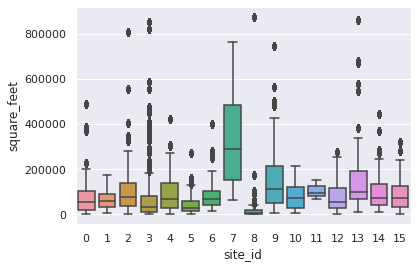

In [ ]:
# Menggunakan BoxPlot
p = sns.boxplot(x="site_id", y="square_feet", data=train_building_weather)

In [ ]:
train_building_weather.loc[train_building_weather['site_id']==8].sort_values(by = ['square_feet'],ascending = False).head(3)
# Building 869 di site 8 cukup besar ukuran bangunannya. Meskipun juga terdapat bangunan yang besarnya lebih dari 800000 sqft pada site lainnya

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,jam,hari,bulan
8672305,869,0,2016-06-09 05:00:00,1787.46,8,Entertainment/public assembly,875000,24.4,4.0,22.8,0.0,1013.7,220.0,2.6,5,Kamis,6
18141017,869,0,2016-11-24 20:00:00,1941.00,8,Entertainment/public assembly,875000,26.7,4.0,16.7,0.0,1021.5,90.0,4.6,20,Kamis,11
1875663,869,0,2016-02-04 00:00:00,1267.04,8,Entertainment/public assembly,875000,23.9,6.0,18.3,0.0,1017.7,150.0,3.6,0,Kamis,2


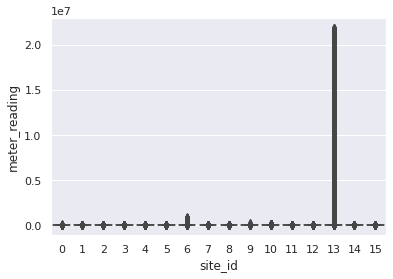

In [ ]:
# Menggunakan BoxPlot
p = sns.boxplot(x="site_id", y="meter_reading", data=train_building_weather)

Terlihat meter reading pada site 13 sangat tinggi.


In [ ]:
train_building_weather.loc[train_building_weather['site_id']==13].sort_values(by = ['meter_reading'],ascending = False).head(1)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,jam,hari,bulan
8907488,1099,2,2016-06-13 09:00:00,21904700.0,13,Education,332884,19.4,8.0,17.2,0.0,1014.4,50.0,6.2,9,Senin,6


Dapat dilihat bahwa bangunan dengan building_id 1099 memiliki nilai meter_reading lebih dari 20,000,000. Building 1099 dalam kasus ini dapat dikatakan sebagai outlier karena dapat mempengaruhi perhitungan.

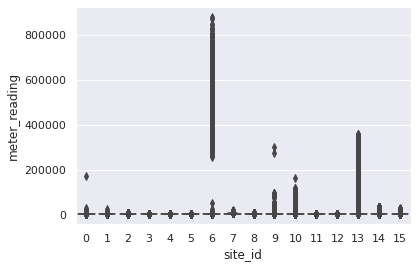

In [ ]:
# Akan dicoba melihat tanpa menggunakan Building 1099
p = sns.boxplot(x="site_id", y="meter_reading", data=train_building_weather.loc[train_building_weather['building_id']!=1099])

Terlihat kembali pada site 6, terdapat building yang cukup tinggi nilai meter readingnya.

In [ ]:
train_building_weather.loc[train_building_weather['site_id']==6].sort_values(by = ['meter_reading'],ascending = False).head(2)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,jam,hari,bulan
13851463,778,1,2016-09-09 17:00:00,880374.0,6,Entertainment/public assembly,108339,33.9,0.0,20.0,0.0,1014.5,205.0,3.35,17,Jumat,9
13853818,778,1,2016-09-09 18:00:00,869242.0,6,Entertainment/public assembly,108339,34.4,0.0,20.0,0.0,1014.1,200.0,4.10,18,Jumat,9


Dapat dikatakan pula bahwa building 778 juga memiliki nilai meter reading yang tinggi.

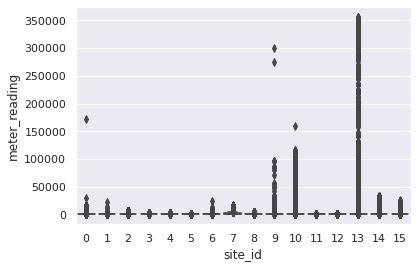

In [ ]:
# Akan dicoba melihat tanpa menggunakan Building 1099 dan 778
p = sns.boxplot(x="site_id", y="meter_reading", data=train_building_weather.loc[(train_building_weather['building_id']!=1099) & (train_building_weather['building_id']!=778)] )

In [ ]:
train_building_weather[train_building_weather['site_id'] == 13].groupby('building_id').agg('mean').sort_values(by = ['meter_reading'],ascending = False).head(5).reset_index()[['building_id','meter_reading']]

,building_id,meter_reading
0,1099,1.907446e+06
1,1197,2.222224e+04
2,1168,1.642528e+04
3,1159,1.199166e+04
4,1148,1.005890e+04


Dapat dilihat bangunan 1197 juga merupakan bangunan dengan mean tertinggi pada site 13.

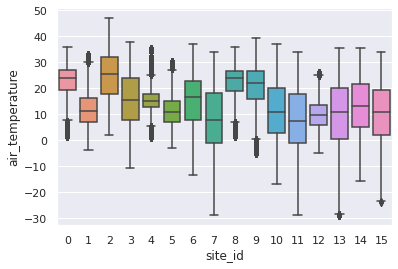

In [ ]:
# air_temperature
p = sns.boxplot(x="site_id", y="air_temperature", data=train_building_weather)

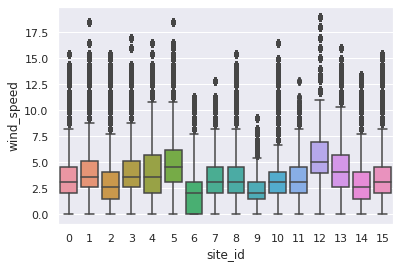

In [ ]:
# wind_speed
p = sns.boxplot(x="site_id", y="wind_speed", data=train_building_weather)

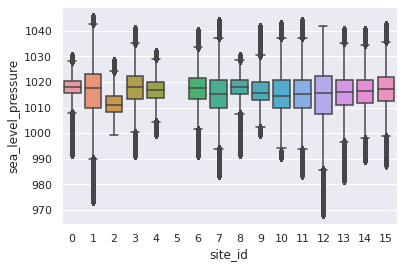

In [ ]:
# sea_level_pressure
p = sns.boxplot(x="site_id", y="sea_level_pressure", data=train_building_weather)

Terlihat pada site 5 tidak memiliki value seperti yang sudah disebutkan sebelumnya.

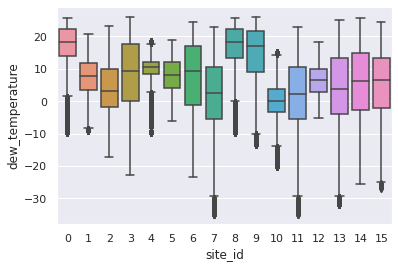

In [ ]:
# dew_temperature
p = sns.boxplot(x="site_id", y="dew_temperature", data=train_building_weather)

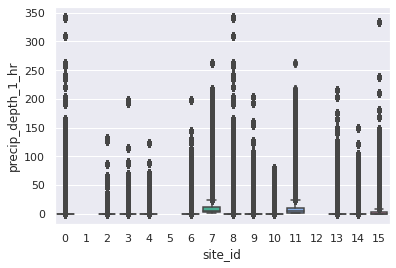

In [ ]:
# precip_depth_1_hr
p = sns.boxplot(x="site_id", y="precip_depth_1_hr", data=train_building_weather)

Terlihat untuk site 1,5, dan 12 tidak memiliki boxplot. Karena tidak memiliki value seperti yang sudah disebutkan sebelumnya.

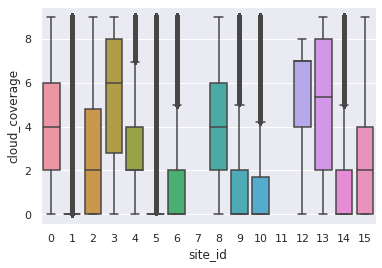

In [ ]:
# cloud_coverage
p = sns.boxplot(x="site_id", y="cloud_coverage", data=train_building_weather)

Pada site 7 dan 11 tidak ada value seperti yang sudah disebutkan sebelumnya.

# Variable Analysis

## Variabel 'meter'

Pada variabel meter, terdapat 4 jenis meter_reading yang digunakan, yakni:


*   0 , menandakan Electricity
*   1 , menandakan Chilled Water 
*   2 , menandakan Steam
*   3 , menandakan Hot Water

Selanjutnya akan diubah nilai pada kolom meter menjadi string



In [ ]:
meter_mapping = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}
train_building_weather['meter'] = train['meter'].map(meter_mapping)

In [ ]:
train_building_weather.sample(3)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,jam,hari,bulan
16752893,746,electricity,2016-10-31 03:00:00,59.3500,6,Office,17879,20.0,1.6,13.9,0.0,1014.6,0.0,0.0,3,Senin,10
5524052,1355,chilledwater,2016-04-14 05:00:00,0.9948,15,Education,50567,-0.6,2.0,-3.3,-1.0,1028.9,340.0,1.5,5,Kamis,4
10823732,1350,electricity,2016-07-17 10:00:00,909.9250,15,Education,149762,13.3,0.0,13.3,-1.0,1020.4,70.0,1.5,10,Minggu,7


In [ ]:
train_building_weather.groupby('meter').agg(len)

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,jam,hari,bulan
meter,,,,,,,,,,,,,,,,,,
chilledwater,4182440,4182440,4182440.0,4182440,4182440,4182440,4182440,4182440.0,4182440.0,4182440.0,4182440.0,4182440.0,4182440.0,4182440.0,4182440.0,4182440,4182440,4182440
electricity,12060910,12060910,12060910.0,12060910,12060910,12060910,12060910,12060910.0,12060910.0,12060910.0,12060910.0,12060910.0,12060910.0,12060910.0,12060910.0,12060910,12060910,12060910
hotwater,1264037,1264037,1264037.0,1264037,1264037,1264037,1264037,1264037.0,1264037.0,1264037.0,1264037.0,1264037.0,1264037.0,1264037.0,1264037.0,1264037,1264037,1264037
steam,2708713,2708713,2708713.0,2708713,2708713,2708713,2708713,2708713.0,2708713.0,2708713.0,2708713.0,2708713.0,2708713.0,2708713.0,2708713.0,2708713,2708713,2708713


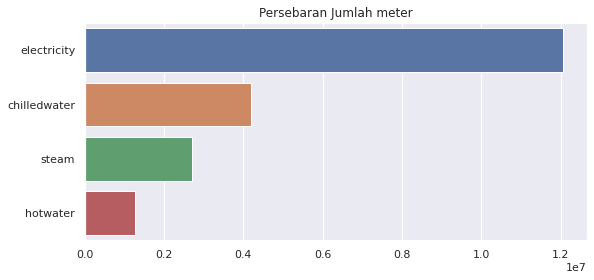

In [ ]:
df = train_building_weather.groupby('meter').agg(len).reset_index().sort_values(by = 'building_id',ascending = False)
plt.figure(figsize=(9,4))
p = sns.barplot(orient = 'h' , x = 'building_id', y = 'meter', data = df)
plt.title('Persebaran Jumlah meter')
plt.xlabel('')
plt.ylabel('')
plt.show()

Terlihat jenis meter_reading Electricity paling banyak digunakan.

In [ ]:
train_building_weather.groupby('meter').mean()

,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,,
chilledwater,633.363924,126915.411699,6.342697,16.766496,1.422822,7.097000,0.760519,1015.464026,165.579998,3.078658
electricity,170.825636,92714.311950,3.798080,16.009653,2.284164,8.334990,0.801528,1016.407898,176.359898,3.559324
hotwater,385.866781,115000.353802,5.006129,17.154435,1.187342,4.634209,0.521646,1014.437338,175.993088,3.127668
steam,13882.187689,141968.440365,9.030584,14.137690,1.300219,7.588065,0.967891,1016.480608,167.362113,3.143017


In [ ]:
train_building_weather.groupby('meter').median()

,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,,
chilledwater,120.4870,91273,3.0,18.3,0.0,7.8,0.0,1015.2,160.0,2.6
electricity,62.8319,57811,3.0,16.7,2.0,9.4,0.0,1016.5,180.0,3.1
hotwater,39.6237,87200,5.0,17.2,0.0,4.4,0.0,1013.8,190.0,3.1
steam,257.8120,102191,5.0,16.1,0.0,9.4,0.0,1016.3,170.0,2.6


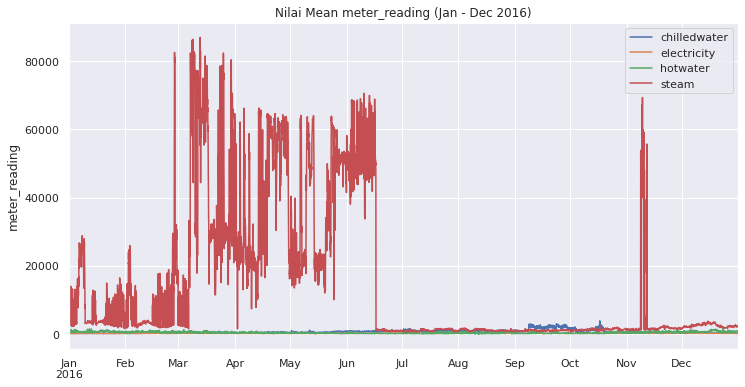

In [ ]:
df = train_building_weather.groupby(['timestamp','meter'])['meter_reading'].agg('mean').reset_index().set_index('timestamp').groupby('meter')['meter_reading']
df.plot(figsize = (12,6))
plt.title('Nilai Mean meter_reading (Jan - Dec 2016)')
plt.xlabel('')
plt.ylabel('meter_reading')
plt.legend()
plt.show()

Dapat dilihat nilai steam cukup tinggi dibandingkan meter lainnya. Dapat dikatakan hal ini disebabkan oleh bangunan outlier yang disebutkan diatas. Akan dicoba menggunakan median.

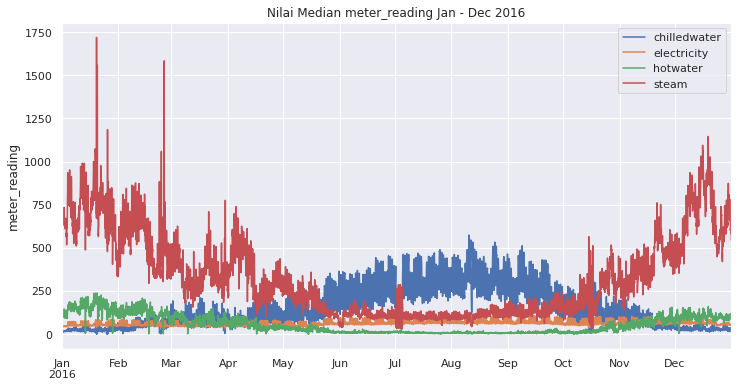

In [ ]:
df = train_building_weather.groupby(['timestamp','meter'])['meter_reading'].agg('median').reset_index().set_index('timestamp').groupby('meter')['meter_reading']
df.plot(figsize = (12,6))
plt.title('Nilai Median meter_reading Jan - Dec 2016')
plt.xlabel('')
plt.ylabel('meter_reading')
plt.legend()
plt.show()

*   Nilai meter_reading dari **steam** merupakan yang **tertinggi**, terutama pada awal dan akhir tahun
*   Dapat dikatakan bahwa terdapat indikasi data diambil dari **negara yang memiliki 4 musim**, dikarenakan penggunaan steam (uap) serta hotwater (air panas) pada musim dingin (Nov-Mar) yang tinggi dan penggunaan chilledwater (air dingin) yang meningkat dan penurunan penggunaar hotwater (air panas) pada pertengahan tahun.

## Variabel Building

Terdapat 16 Jenis bangunan yang ada pada dataset ini.

In [ ]:
train_building_weather['primary_use'].unique().tolist()

['Education',
 'Lodging/residential',
 'Office',
 'Entertainment/public assembly',
 'Other',
 'Retail',
 'Parking',
 'Public services',
 'Warehouse/storage',
 'Food sales and service',
 'Religious worship',
 'Healthcare',
 'Utility',
 'Technology/science',
 'Manufacturing/industrial',
 'Services']

In [ ]:
pd.DataFrame({
    'primary_use':building_metadata.groupby('primary_use').agg(len).reset_index().sort_values(by='site_id',ascending=False)['primary_use'],
    'Jumlah Bangunan':building_metadata.groupby('primary_use').agg(len).reset_index().sort_values(by='site_id',ascending=False)['site_id']
})

,primary_use,Jumlah Bangunan
0,Education,549
6,Office,279
1,Entertainment/public assembly,184
9,Public services,156
4,Lodging/residential,147
7,Other,25
3,Healthcare,23
8,Parking,22
15,Warehouse/storage,13
5,Manufacturing/industrial,12


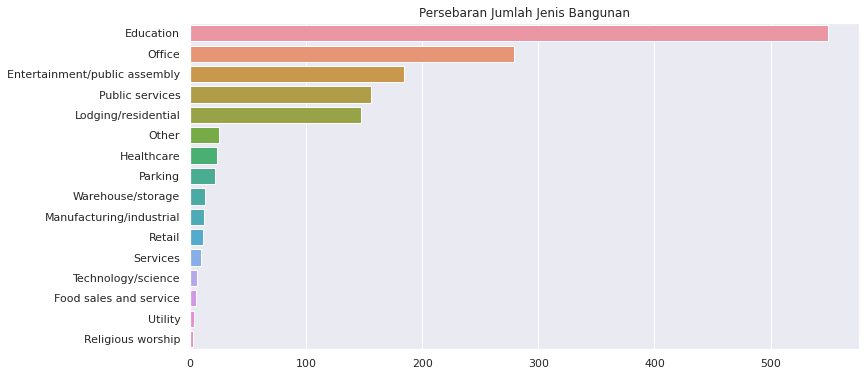

In [ ]:
df = building_metadata.groupby('primary_use').agg(len).reset_index().sort_values(by='site_id',ascending=False)
plt.figure(figsize = (12,6))
p = sns.barplot(y = 'primary_use', x = 'site_id', data = df, orient = 'h')
plt.title('Persebaran Jumlah Jenis Bangunan')
plt.xlabel('')
plt.ylabel('')
plt.show()

Terlihat tipe bangunan Education memiliki jumlah terbanyak disusul oleh Office dan Entertainment. Tipe bagunan Religious merupakan yang paling sedikit.

In [ ]:
train_building_weather.groupby(['primary_use']).agg('mean').reset_index().sort_values(by = 'meter_reading',ascending = False)[["primary_use","meter_reading"]]

,primary_use,meter_reading
0,Education,4585.091840
12,Services,4113.468284
3,Healthcare,738.597583
6,Office,526.504420
14,Utility,512.736861
1,Entertainment/public assembly,473.880691
2,Food sales and service,304.908018
9,Public services,288.237846
5,Manufacturing/industrial,285.897005
4,Lodging/residential,279.710439


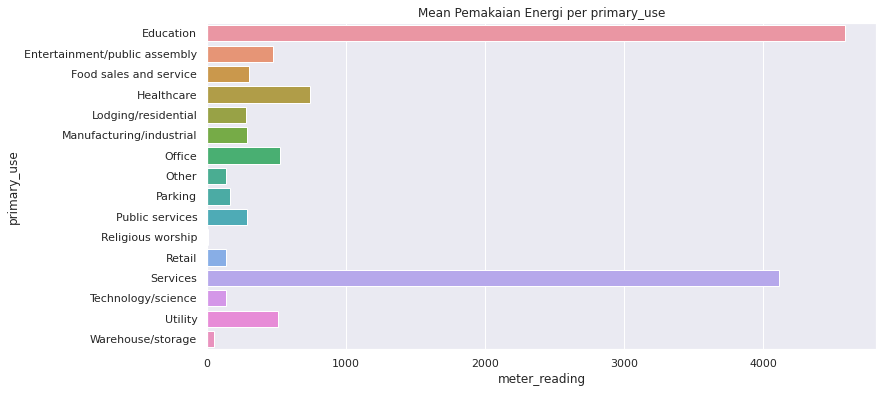

In [ ]:
df1 = train_building_weather.groupby(['primary_use']).agg('mean').reset_index().sort_values(by = 'meter_reading',ascending = False)
plt.figure(figsize = (12,6))
p = sns.barplot(
    y = 'primary_use',
    x = 'meter_reading',
    data = df1,
    orient = 'h'
)
plt.title('Mean Pemakaian Energi per primary_use')
plt.show()

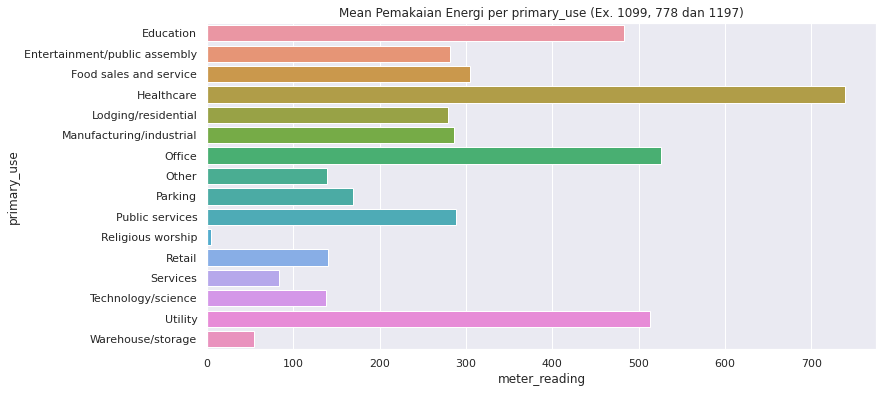

In [ ]:
df = train_building_weather.loc[(train_building_weather['building_id']!=1099) & (train_building_weather['building_id']!=778) & (train_building_weather['building_id']!=1197)]
df1 = df.groupby(['primary_use']).agg('mean').reset_index().sort_values(by = 'meter_reading',ascending = False)
plt.figure(figsize = (12,6))
p = sns.barplot(
    y = 'primary_use',
    x = 'meter_reading',
    data = df1,
    orient = 'h'
)
plt.title('Mean Pemakaian Energi per primary_use (Ex. 1099, 778 dan 1197)')
plt.show()

In [ ]:
train_building_weather.groupby(['primary_use']).agg('mean').reset_index().sort_values(by = 'square_feet',ascending = False)[["primary_use","square_feet"]]

,primary_use,square_feet
8,Parking,287217.872594
12,Services,186846.917705
3,Healthcare,138438.671365
0,Education,119998.782690
1,Entertainment/public assembly,106256.004265
4,Lodging/residential,100830.731729
6,Office,96837.479905
9,Public services,88863.278151
13,Technology/science,66740.011220
15,Warehouse/storage,46210.507514


Dan untuk tempat parkir memiliki luas banguan yang paling besar dibandingkan yang lainnya, namun penggunaan energi cukup kecil. Hal ini dikarenakan, dibutuhkan wilayah yang luas untuk menampung kendaraan, namun penggunaan energinya mungkin hanya disalurkan untuk penerangan.

Selanjutnya akan dilihat terkait variabel square_feet

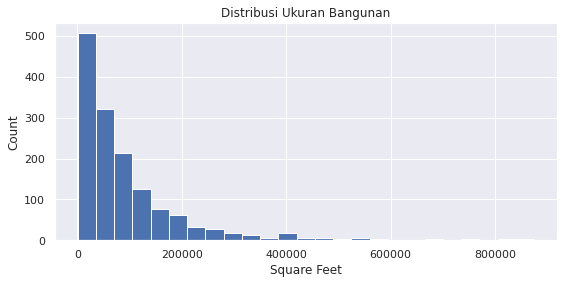

In [ ]:
plt.figure(figsize = (9,4))
plt.hist(building_metadata['square_feet'],bins = 25)
plt.title('Distribusi Ukuran Bangunan')
plt.xlabel('Square Feet')
plt.ylabel('Count')
plt.show()

Terlihat bangunan paling banyak berukuran kurang dari 400,000 sqft.

Akan dilihat hubungan antara square_feet dengan meter_reading.

In [ ]:
train_building_weather['square_feet'].max()

875000

In [ ]:
sq_binned = pd.cut(train_building_weather['square_feet'], bins=np.arange(0, 900000, 100000)) # Nilai bangunan terbesar berukuran 875,000 maka batas atas binning adalah 900,000
sq_binned = pd.DataFrame(sq_binned)
sq_binned.columns = ["sq_binned"]
tmp_df = pd.concat([train_building_weather[['meter_reading','meter']], sq_binned], axis=1)
tmp_df = pd.DataFrame(tmp_df.groupby('sq_binned').agg('mean')['meter_reading']).reset_index()

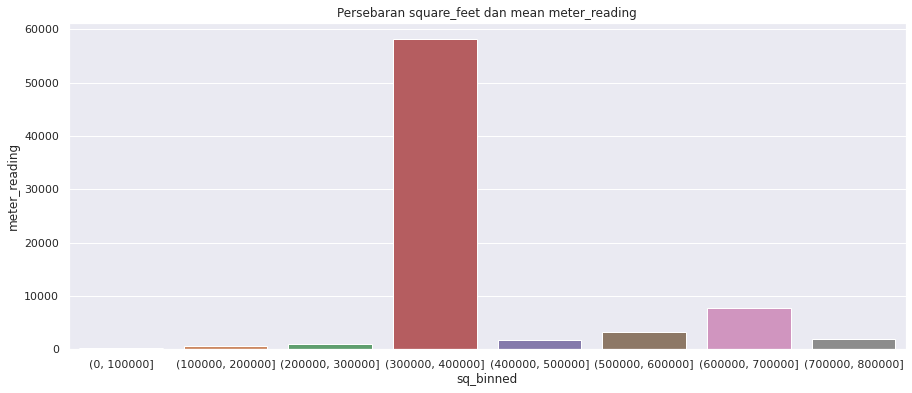

In [ ]:
plt.figure(figsize = (15,6))
p = sns.barplot(x = 'sq_binned', y = 'meter_reading', data = tmp_df)
plt.title('Persebaran square_feet dan mean meter_reading')
plt.show()

Akan dikeluarkan building 1099 dan 778.

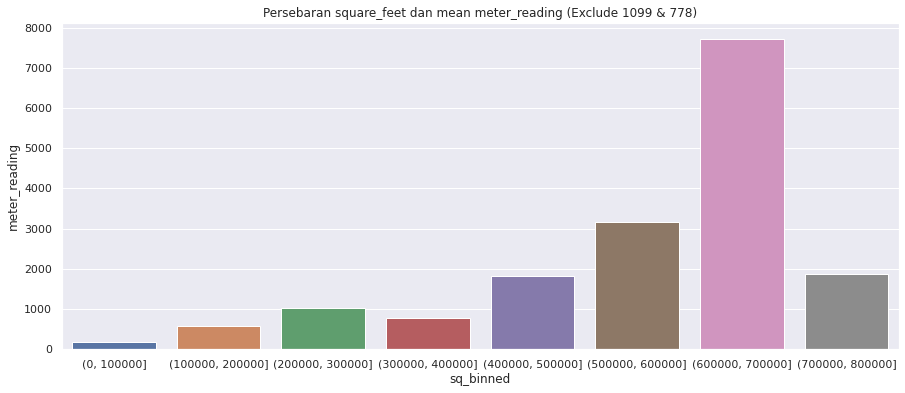

In [ ]:
df = train_building_weather.loc[(train_building_weather['building_id']!=1099) & (train_building_weather['building_id']!=778)]
sq_binned = pd.cut(df['square_feet'], bins=np.arange(0, 900000, 100000))
sq_binned = pd.DataFrame(sq_binned)
sq_binned.columns = ["sq_binned"]
tmp_df = pd.concat([df[['meter_reading','meter']], sq_binned], axis=1)
tmp_df = pd.DataFrame(tmp_df.groupby('sq_binned').agg('mean')['meter_reading']).reset_index()
plt.figure(figsize = (15,6))
p = sns.barplot(x = 'sq_binned', y = 'meter_reading', data = tmp_df)
plt.title('Persebaran square_feet dan mean meter_reading (Exclude 1099 & 778)')
plt.show()

Setelah dikeluarkannya bangunan 1099 dan 778, terlihat bahwa semakin besar nilai square_feet, semakin besar pula mean dari meter_reading. Terutama pada bangunan yang berukuran antara 600,000 sqft dan 700,000 sqft yang memiliki nilai mean meter_reading tertinggi.

## Variabel Waktu (timestamp,hari,waktu,bulan)

Akan dicoba untuk melihat median dari penggunaan meter_reading per bulannya.

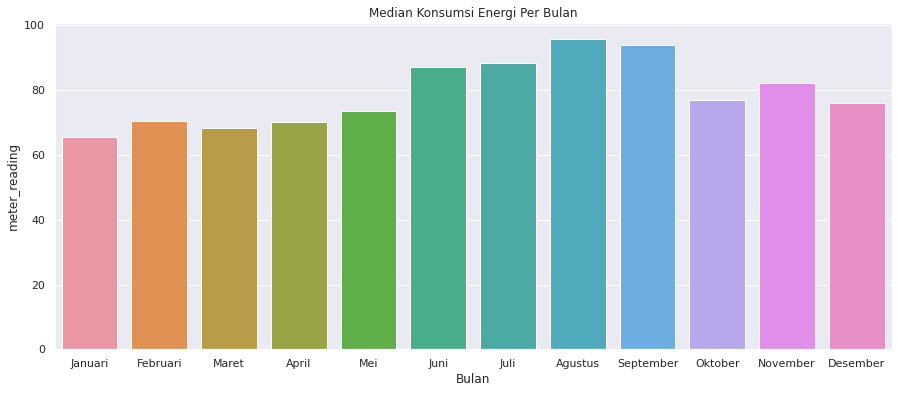

In [ ]:
df = train_building_weather.groupby('bulan').agg('median').reset_index()
month_index = {
    1:'Januari',
    2:'Februari',
    3:'Maret',
    4:'April',
    5:'Mei',
    6:'Juni',
    7:'Juli',
    8:'Agustus',
    9:'September',
    10:'Oktober',
    11:'November',
    12:'Desember'
}
df['bulan'] = [month_index[i] for i in df['bulan']]
plt.figure(figsize = (15,6))
p = sns.barplot(x = 'bulan', y = 'meter_reading', data = df)
plt.title('Median Konsumsi Energi Per Bulan')
plt.xlabel('Bulan')
plt.show()

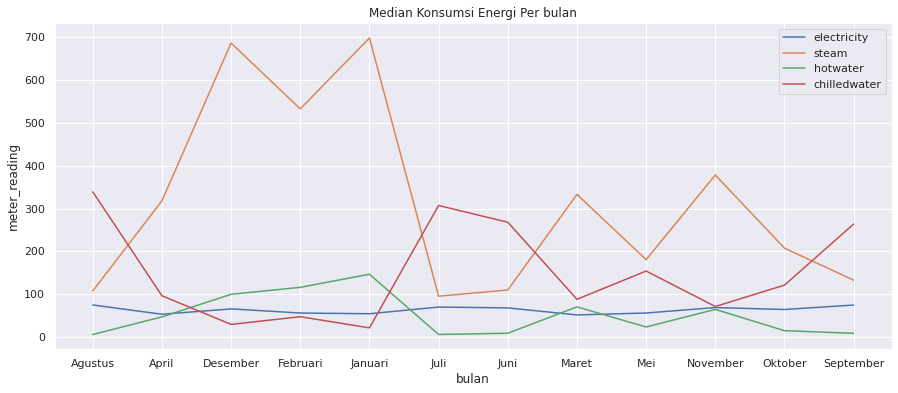

In [ ]:
df = train_building_weather.copy()
df['bulan'] = [month_index[i] for i in df['bulan']]

df0 = df.loc[train_building_weather['meter'] == 'electricity'].groupby('bulan').agg('median').reset_index()
df1 = df.loc[train_building_weather['meter'] == 'steam'].groupby('bulan').agg('median').reset_index()
df2 = df.loc[train_building_weather['meter'] == 'hotwater'].groupby('bulan').agg('median').reset_index()
df3 = df.loc[train_building_weather['meter'] == 'chilledwater'].groupby('bulan').agg('median').reset_index()

plt.figure(figsize = (15,6))
p = sns.lineplot(x = 'bulan', y = 'meter_reading', data = df0, label = 'electricity')
p1 = sns.lineplot(x = 'bulan', y = 'meter_reading', data = df1, label = 'steam')
p2 = sns.lineplot(x = 'bulan', y = 'meter_reading', data = df2, label = 'hotwater')
p2  = sns.lineplot(x = 'bulan', y = 'meter_reading', data = df3, label = 'chilledwater')

plt.title('Median Konsumsi Energi Per bulan')
plt.xlabel('bulan')
plt.legend()
plt.show()

Dapat dilihat bahwa pada bulan November - Februari tedapat kecenderungan konsumsi energi steam dan hot water naik dari bulan lainnya, dimungkinkan pada bulan tersebut kebanyakan wilayah sedang mengalami musim dingin sehingga terdapat kecenderungan dalam memakai energi untuk penghangatan. 

Pada bulan Juni - Agustus juga terlihat kecenderungan penggunaan energi yang meningkat dari bulan lainnya untuk chilled water , yang di mungkinkan pada bulan tersebut kebanyakan wilayah sedang mengalami musim panas.

Sedangkan konsumsi electricity selalu cenderung tidak mengalami perubahan signifikan untuk setiap bulan, karena pemakaian listrik ini tidak berdasarkan musim, dan selalu dibutuhkan.

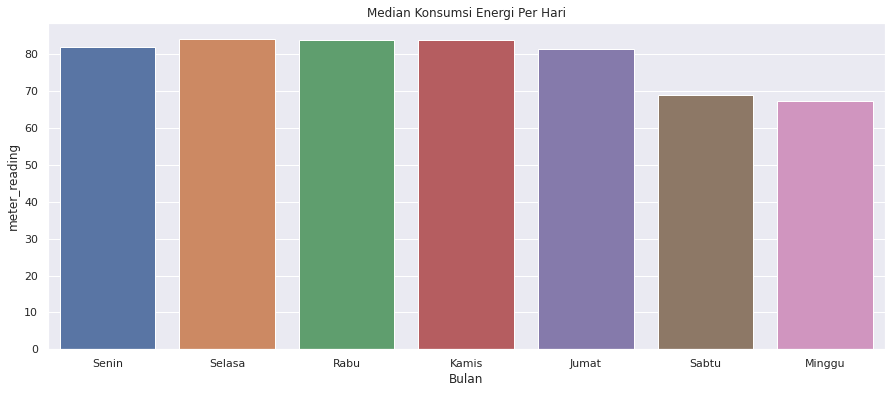

In [ ]:
df = train_building_weather.groupby('hari').agg('median').reset_index()
plt.figure(figsize = (15,6))
p = sns.barplot(x = 'hari', y = 'meter_reading', data = df, order = ['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu'])
plt.title('Median Konsumsi Energi Per Hari')
plt.xlabel('Bulan')
plt.show()

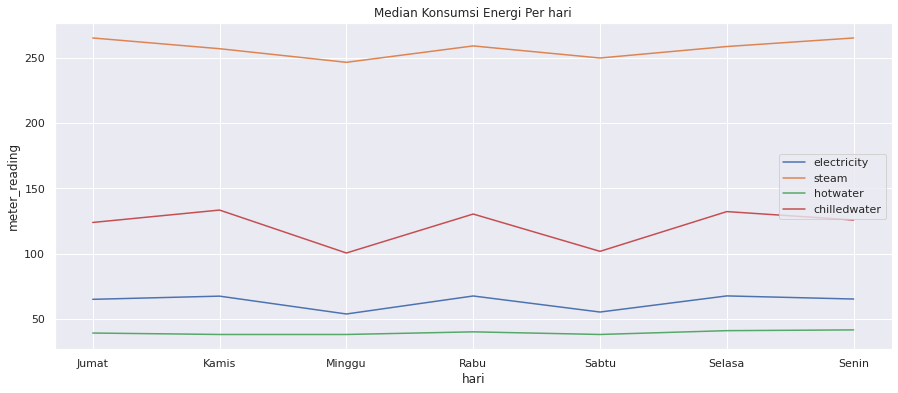

In [ ]:
df0 = train_building_weather.loc[train_building_weather['meter'] == 'electricity'].groupby('hari').agg('median').reset_index()
df1 = train_building_weather.loc[train_building_weather['meter'] == 'steam'].groupby('hari').agg('median').reset_index()
df2 = train_building_weather.loc[train_building_weather['meter'] == 'hotwater'].groupby('hari').agg('median').reset_index()
df3 = train_building_weather.loc[train_building_weather['meter'] == 'chilledwater'].groupby('hari').agg('median').reset_index()

plt.figure(figsize = (15,6))
p = sns.lineplot(x = 'hari', y = 'meter_reading', data = df0, label = 'electricity')
p1 = sns.lineplot(x = 'hari', y = 'meter_reading', data = df1, label = 'steam')
p2 = sns.lineplot(x = 'hari', y = 'meter_reading', data = df2, label = 'hotwater')
p2  = sns.lineplot(x = 'hari', y = 'meter_reading', data = df3, label = 'chilledwater')

plt.title('Median Konsumsi Energi Per hari')
plt.xlabel('hari')
plt.legend()
plt.show()

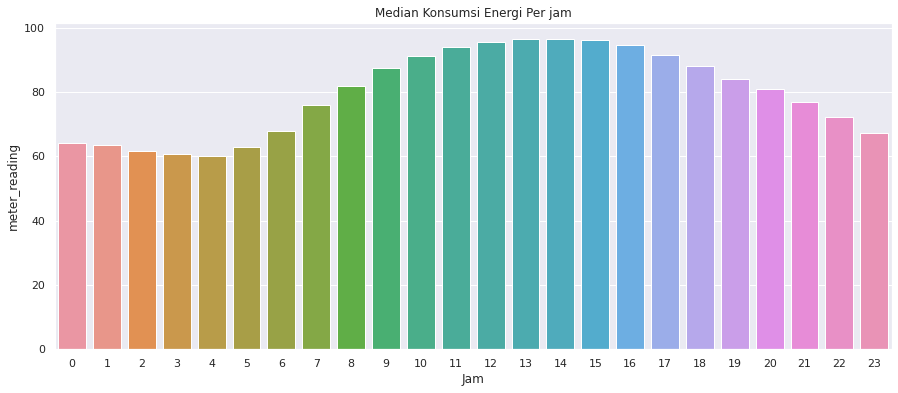

In [ ]:
df = train_building_weather.groupby('jam').agg('median').reset_index()
plt.figure(figsize = (15,6))
p = sns.barplot(x = 'jam', y = 'meter_reading', data = df)
plt.title('Median Konsumsi Energi Per jam')
plt.xlabel('Jam')
plt.show()

Dari plot diatas terlihat bahwa penggunaan energi siang hari cenderung tinggi, dikarenakan lebih banyak kegiatan yang dilakukan pada siang hari, misalnya: bekerja dikantor menggunakan pengingin ruangan, listrik untuk komputer, penerangan di dalam gedung dll terjadi secara bersamaan.

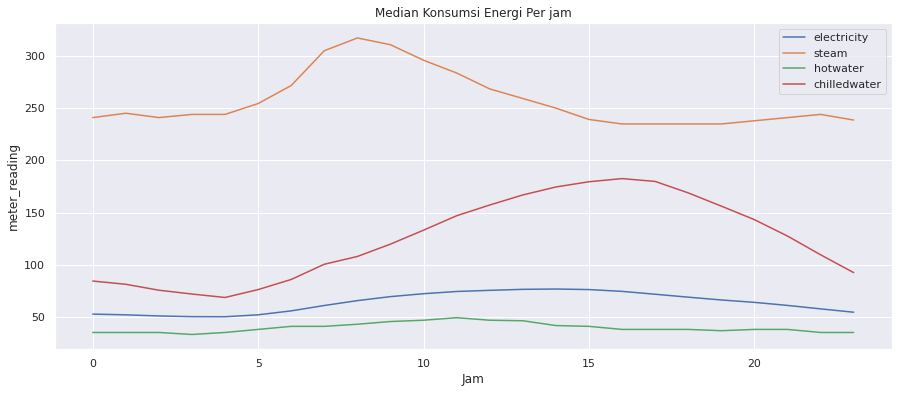

In [ ]:
df0 = train_building_weather.loc[train_building_weather['meter'] == 'electricity'].groupby('jam').agg('median').reset_index()
df1 = train_building_weather.loc[train_building_weather['meter'] == 'steam'].groupby('jam').agg('median').reset_index()
df2 = train_building_weather.loc[train_building_weather['meter'] == 'hotwater'].groupby('jam').agg('median').reset_index()
df3 = train_building_weather.loc[train_building_weather['meter'] == 'chilledwater'].groupby('jam').agg('median').reset_index()

plt.figure(figsize = (15,6))
p = sns.lineplot(x = 'jam', y = 'meter_reading', data = df0, label = 'electricity')
p1 = sns.lineplot(x = 'jam', y = 'meter_reading', data = df1, label = 'steam')
p2 = sns.lineplot(x = 'jam', y = 'meter_reading', data = df2, label = 'hotwater')
p2  = sns.lineplot(x = 'jam', y = 'meter_reading', data = df3, label = 'chilledwater')

plt.title('Median Konsumsi Energi Per jam')
plt.xlabel('Jam')
plt.legend()
plt.show()

## Variabel Weather

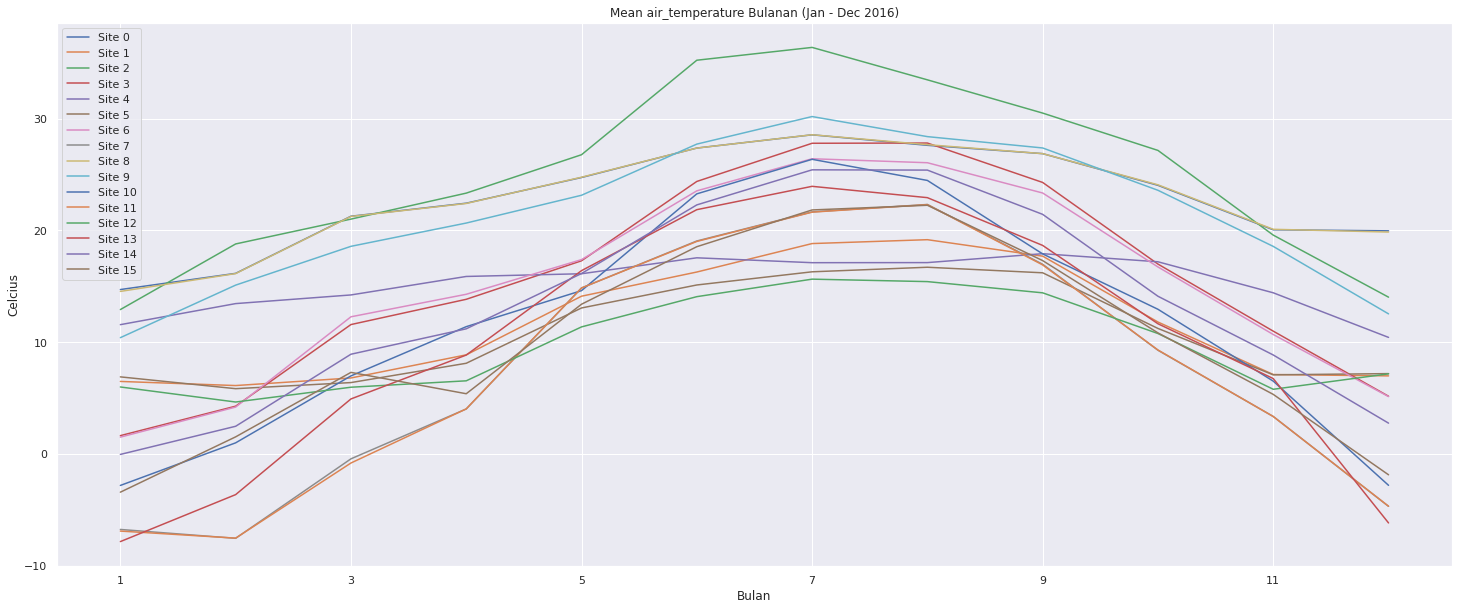

In [ ]:
plt.figure(figsize = (25,10))
df = train_building_weather.copy()

for i in range(16):
  df[df['site_id']==i].groupby('bulan').agg('mean')['air_temperature'].plot(label = f"Site {i}")
plt.legend()
plt.xlabel('Bulan')
plt.ylabel('Celcius')
plt.title('Mean air_temperature Bulanan (Jan - Dec 2016)')
plt.show()

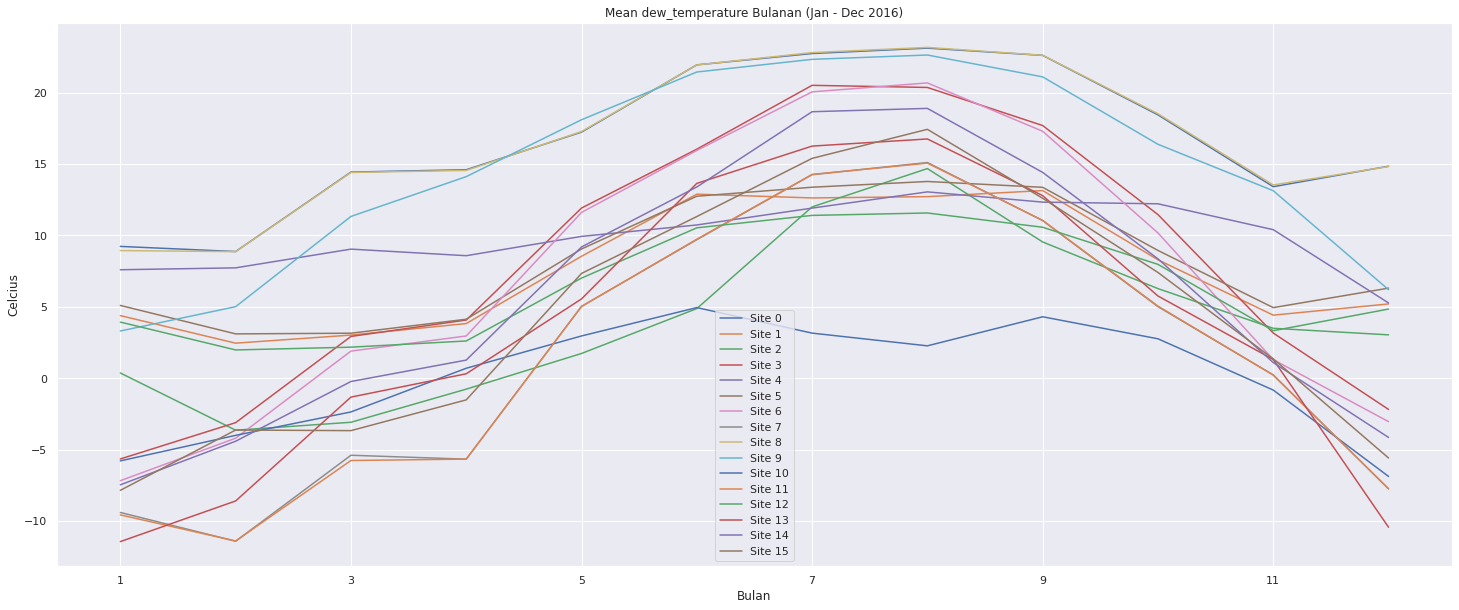

In [ ]:
plt.figure(figsize = (25,10))
df = train_building_weather.copy()

for i in range(16):
  df[df['site_id']==i].groupby('bulan').agg('mean')['dew_temperature'].plot(label = f"Site {i}")
plt.legend()
plt.xlabel('Bulan')
plt.ylabel('Celcius')
plt.title('Mean dew_temperature Bulanan (Jan - Dec 2016)')
plt.show()

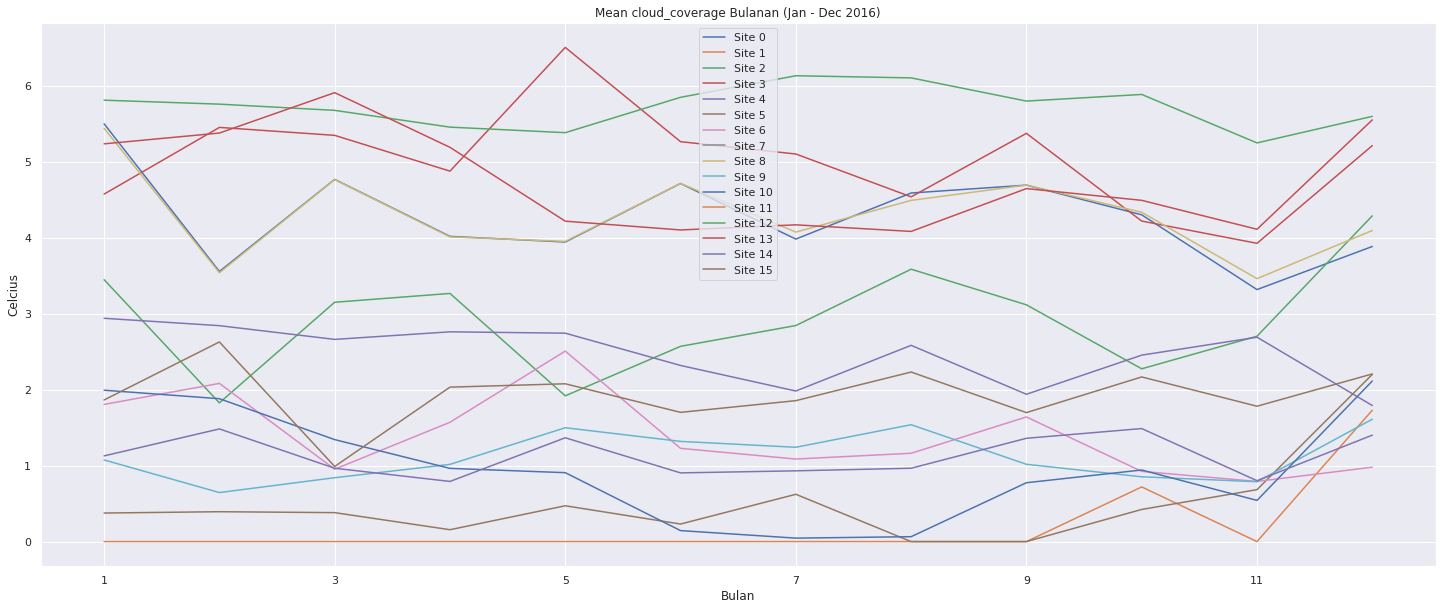

In [ ]:
plt.figure(figsize = (25,10))
df = train_building_weather.copy()

for i in range(0,16):
  df[df['site_id']==i].groupby('bulan').agg('mean')['cloud_coverage'].plot(label = f"Site {i}")
plt.legend()
plt.xlabel('Bulan')
plt.ylabel('Celcius')
plt.title('Mean cloud_coverage Bulanan (Jan - Dec 2016)')
plt.show()

Dapat dilihat untuk site 12, 3, 13, 8, dan 0 lebih berawan dibandingkan site lainnya.

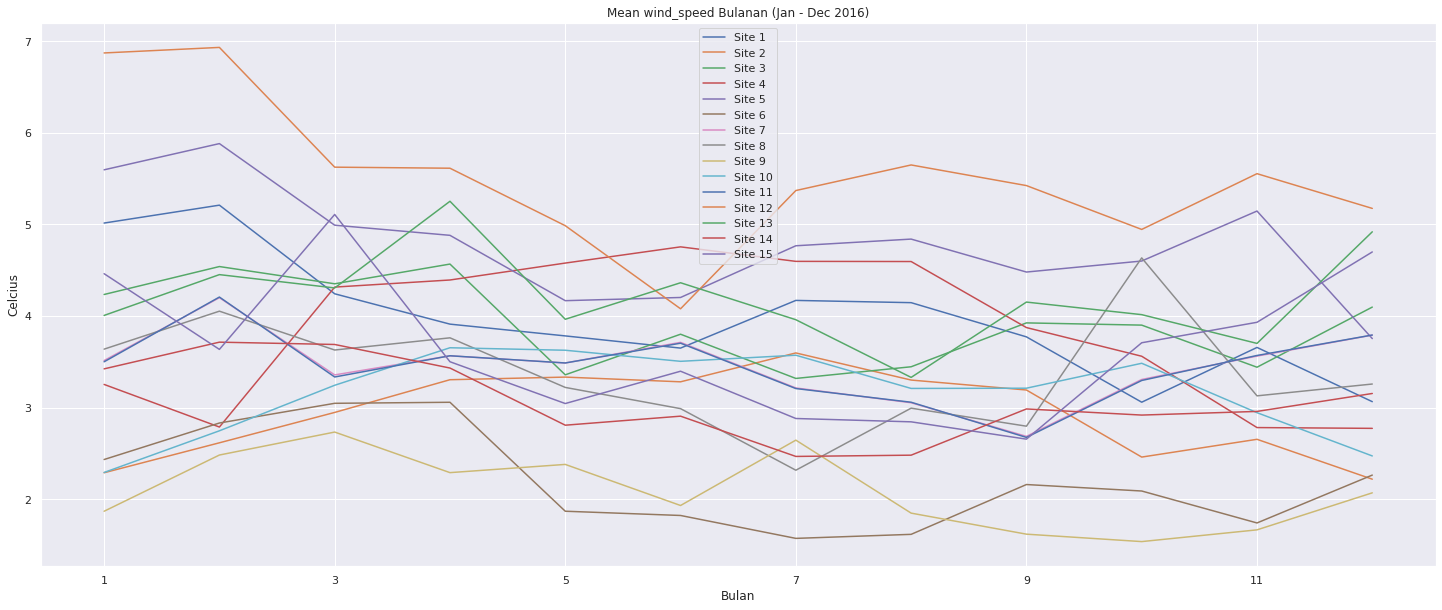

In [ ]:
plt.figure(figsize = (25,10))
df = train_building_weather.copy()

for i in range(1,16):
  df[df['site_id']==i].groupby('bulan').agg('mean')['wind_speed'].plot(label = f"Site {i}")
plt.legend()
plt.xlabel('Bulan')
plt.ylabel('Celcius')
plt.title('Mean wind_speed Bulanan (Jan - Dec 2016)')
plt.show()

Dari variabel air_temperature serta dew_temperature yang menunjukan peningkatan pada pertengahan tahun dan penurunan pada akhir dan awal tahun (Siklikal) pada semua site, **indikasi bahwa data diambil pada negara 4 musim semakin kuat.**

## Intra-Variabel

Akan dilihat terkait hubungan korelasi antar masing-masing variabel.

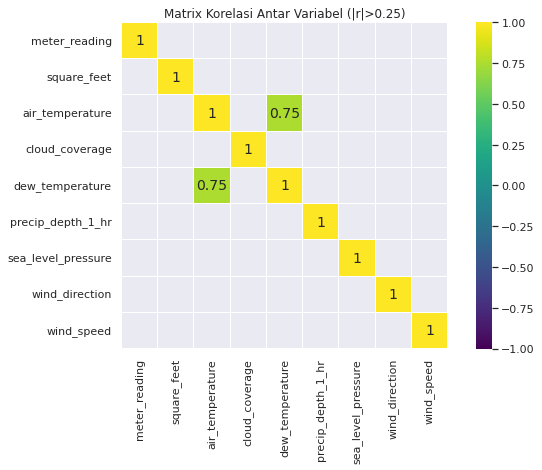

In [ ]:
# Correlation Matrix
corr2 = train_building_weather.corr() 
plt.figure(figsize=(10, 6))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.5)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 14}, square=True)
plt.title('Matrix Korelasi Antar Variabel (|r|>0.25)')
plt.show()            

Dapat dilihat hanya **air_temperature** dan **dew_temperature** yang memiliki korelasi **diatas 0.5**. Sedangkan korelasi antar variabel lainnya cukup kecil atau tidak signifikan.

## Insight yang didapatkan

*  Data diambil dari daerah yang memiliki **4 musim.** Sehingga penggunaan **alat - alat elektronik juga dipengaruhi oleh bulan (atau musim)**.
*  Site 2, 0, dan 8 merupakan daerah dengan **air_temperature tertinggi (panas)** , sedangkan site 12, 7, & 11 merupakan daerah dengan **air_temperature terendah (dingin).**
*  Bangunan yang menggunakan energi **terbesar** ialah jenis bangunan **Healthcare disusul oleh Education dan Utility**. Sedangkan bangunan yang menggunakan energi paling **sedikit** ialah **religious worship, warehouse, dan services.**
*  Kelompok kami merekomendasikan para perushaan pembuat alat elektronik steam untuk membuat **alat steam yang lebih efisien** karena dari data yang ada, **alat steam merupakan penyumbang energi terbesar.**


In [ ]:
data_gedung=pd.read_csv("Documents/datmin/building_metadata.csv")